In [5]:
import pandas as pd


excel_file = pd.ExcelFile('Newquay Zoo Footfall 2018 2024.xlsx')


sheet_names = excel_file.sheet_names
print(sheet_names)


nz = pd.read_excel(excel_file, sheet_name='Newquay Footfall')
print(nz.head())

['Instructions', 'Newquay Summary', 'Newquay Footfall']
        Date Financial Year  Year  Month Month Text  Day  Admissions\nAdult  \
0 2018-11-01        2018/19  2018     11        Nov    1              175.0   
1 2018-11-02        2018/19  2018     11        Nov    2               99.0   
2 2018-11-03        2018/19  2018     11        Nov    3              113.0   
3 2018-11-04        2018/19  2018     11        Nov    4               64.0   
4 2018-11-05        2018/19  2018     11        Nov    5               88.0   

   Admissions\nChild  Education\nAdult  Education\nChild  Family\nAdult  \
0               57.0               4.0               4.0           78.0   
1               29.0               1.0               1.0           46.0   
2               26.0               NaN               NaN           14.0   
3               17.0               NaN               NaN           16.0   
4                5.0               NaN               NaN            4.0   

   Family\nChild  

In [14]:
nz.columns = [
    'Date', 'Financial Year', 'Year', 'Month', 'Month Text', 'Day', 
    'Admissions Adult', 'Admissions Child', 'Education Adult', 'Education Child', 
    'Family Adult', 'Family Child', 'Unpaids Adult', 'Unpaids Child', 
    'Annual Members Adult', 'Annual Members Child', 'Total', 'Total Excl Education'
]


nz['Date'] = pd.to_datetime(nz['Date'], format='%Y-%m-%d')


numerical_columns = [
    'Admissions Adult', 'Admissions Child', 'Education Adult', 'Family Adult', 
    'Family Child', 'Unpaids Adult', 'Unpaids Child', 'Annual Members Adult', 
    'Annual Members Child'
]
nz[numerical_columns] = nz[numerical_columns].fillna(0)

nz['Education Child'] = pd.to_numeric(nz['Education Child'], errors='coerce').fillna(0)


nz['Financial Year'] = nz['Financial Year'].fillna('Unknown')


nz.head()


,Date,Financial Year,Year,Month,Month Text,Day,Admissions Adult,Admissions Child,Education Adult,Education Child,Family Adult,Family Child,Unpaids Adult,Unpaids Child,Annual Members Adult,Annual Members Child,Total,Total Excl Education
0,2018-11-01,2018/19,2018,11,Nov,1,175.0,57.0,4.0,4.0,78.0,78.0,44.0,20.0,81.0,9.0,550,542
1,2018-11-02,2018/19,2018,11,Nov,2,99.0,29.0,1.0,1.0,46.0,46.0,43.0,22.0,29.0,1.0,317,315
2,2018-11-03,2018/19,2018,11,Nov,3,113.0,26.0,0.0,0.0,14.0,14.0,18.0,10.0,35.0,15.0,245,245
3,2018-11-04,2018/19,2018,11,Nov,4,64.0,17.0,0.0,0.0,16.0,16.0,14.0,6.0,21.0,6.0,160,160
4,2018-11-05,2018/19,2018,11,Nov,5,88.0,5.0,0.0,0.0,4.0,4.0,15.0,3.0,43.0,2.0,164,164


In [15]:

monthly_visitors_nz = nz.resample('M', on='Date')['Total'].sum().reset_index()


monthly_visitors_nz.head()



,Date,Total
0,2018-11-30,4471
1,2018-12-31,3189
2,2019-01-31,4245
3,2019-02-28,7768
4,2019-03-31,7286


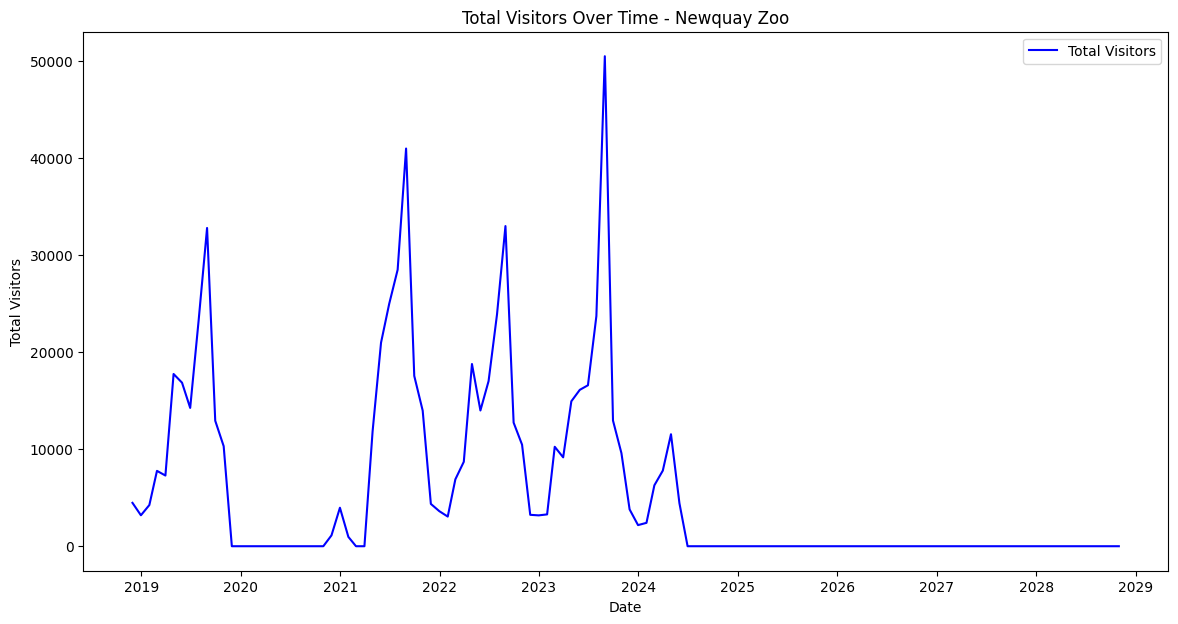

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(monthly_visitors_nz['Date'], monthly_visitors_nz['Total'], label='Total Visitors', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Visitors')
plt.title('Total Visitors Over Time - Newquay Zoo')
plt.legend()
plt.show()


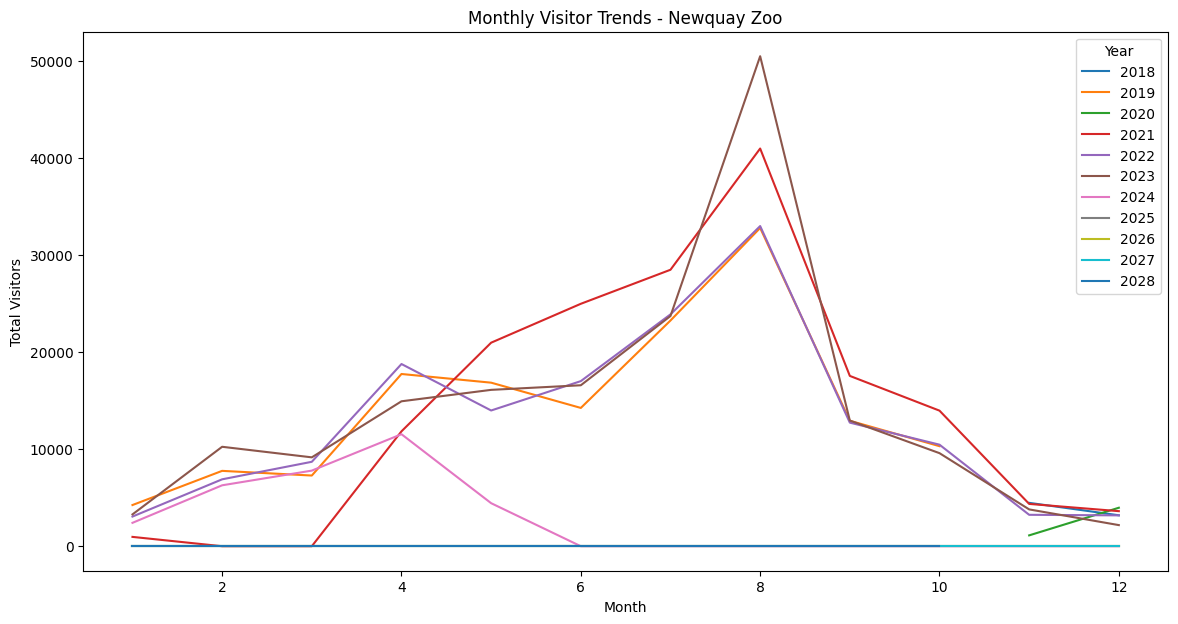

In [17]:
import seaborn as sns


nz['Year'] = nz['Date'].dt.year
nz['Month'] = nz['Date'].dt.month


monthly_totals_nz = nz.groupby(['Year', 'Month'])['Total'].sum().reset_index()


plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_totals_nz, x='Month', y='Total', hue='Year', palette='tab10')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.title('Monthly Visitor Trends - Newquay Zoo')
plt.legend(title='Year')
plt.show()


/tmp/ipykernel_668/1824166371.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=visitor_totals_nz, x='Category', y='Total', palette='viridis')


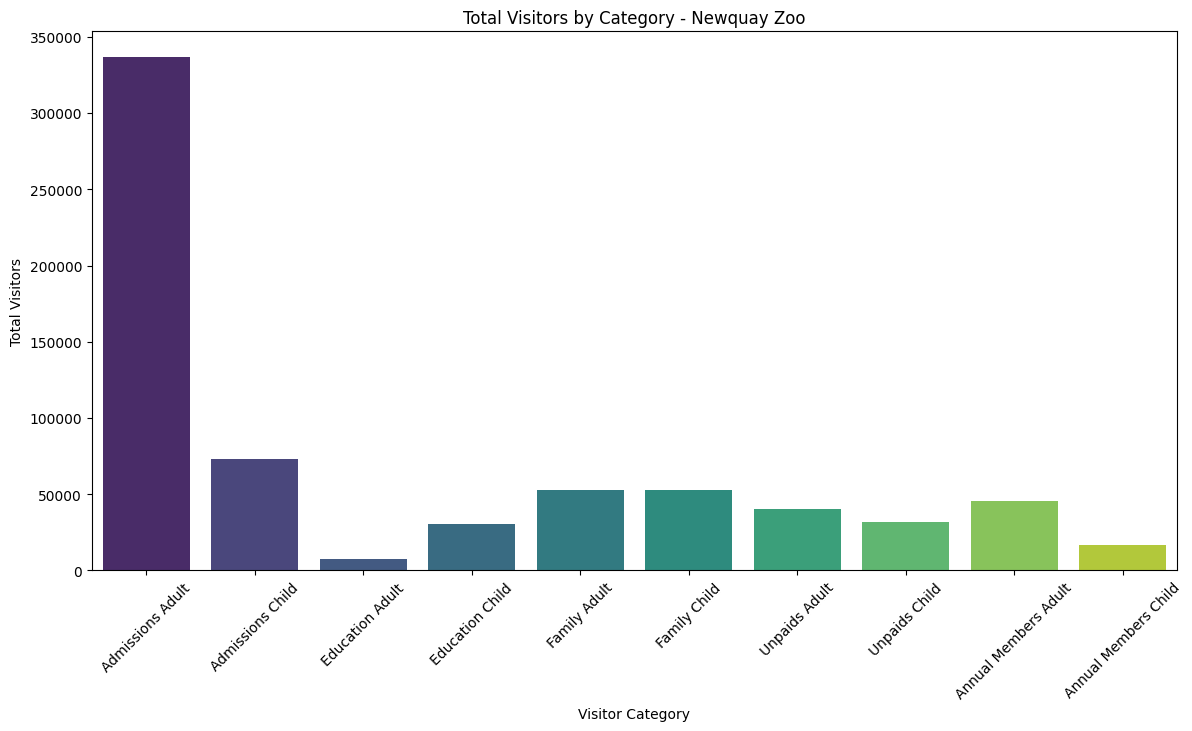

In [19]:
# Sum the total visitors by category
visitor_categories_nz = [
    'Admissions Adult', 'Admissions Child', 'Education Adult', 'Education Child', 
    'Family Adult', 'Family Child', 'Unpaids Adult', 'Unpaids Child', 
    'Annual Members Adult', 'Annual Members Child'
]
visitor_totals_nz = nz[visitor_categories_nz].sum().reset_index()
visitor_totals_nz.columns = ['Category', 'Total']

# Plot total visitors by category
plt.figure(figsize=(14, 7))
sns.barplot(data=visitor_totals_nz, x='Category', y='Total', palette='viridis')
plt.xlabel('Visitor Category')
plt.ylabel('Total Visitors')
plt.title('Total Visitors by Category - Newquay Zoo')
plt.xticks(rotation=45)
plt.show()
